In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import glob 
import os
from sklearn import svm

In [8]:
# We'll start by doing some exploratory analysis on just one year of stats to get a feel for the data.
stats00 = pd.read_csv("data/2000.csv")

In [9]:
stats00.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
0,1,Tariq Abdul-Wahad\abdulta01,SG,25,TOT,61,56,1578,8.6,20.3,...,9.2,3.1,1.9,0.9,3.3,4.6,21.9,NaN,98.0,103
1,1,Tariq Abdul-Wahad\abdulta01,SG,25,ORL,46,46,1205,9.1,21.1,...,9.8,2.9,2.2,0.7,3.6,4.7,23.0,NaN,98.0,101
2,1,Tariq Abdul-Wahad\abdulta01,SG,25,DEN,15,10,373,6.9,17.8,...,7.1,3.5,0.8,1.6,2.6,4.2,18.2,NaN,96.0,109
3,2,Shareef Abdur-Rahim\abdursh01,SF,23,VAN,82,82,3223,9.7,20.9,...,13.5,4.4,1.5,1.4,4.1,4.0,27.2,NaN,108.0,106
4,3,Cory Alexander\alexaco01,PG,26,DEN,29,2,329,4.3,15.1,...,6.5,8.9,3.7,0.3,4.3,6.0,12.6,NaN,84.0,103


In [10]:
stats00.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,494.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,0.0,495.000000,496.000000
mean,216.266129,27.620968,51.340726,24.566532,1200.512097,6.947379,16.410081,0.427391,0.845968,2.628427,...,9.182863,4.246774,1.671573,1.060685,3.154637,5.850000,18.263105,NaN,99.854545,104.423387
std,127.421886,4.471400,27.146494,30.777068,957.736755,2.506427,5.262163,0.099196,1.062161,2.987938,...,4.335301,3.141754,0.990632,1.177554,1.593021,2.833216,6.393111,NaN,16.261871,4.328690
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,88.000000
25%,103.750000,24.000000,26.750000,0.000000,331.500000,5.300000,13.275000,0.394250,0.000000,0.100000,...,5.700000,2.100000,1.100000,0.300000,2.300000,4.100000,13.775000,NaN,94.500000,102.000000
50%,213.500000,27.000000,58.000000,7.000000,1021.000000,6.900000,16.000000,0.432500,0.300000,1.500000,...,8.400000,3.200000,1.600000,0.700000,3.100000,5.300000,18.200000,NaN,102.000000,104.500000
75%,327.250000,31.000000,77.000000,53.250000,1953.750000,8.600000,19.725000,0.471000,1.500000,4.625000,...,12.425000,5.725000,2.125000,1.400000,3.900000,7.100000,22.425000,NaN,108.000000,107.250000
max,439.000000,39.000000,85.000000,82.000000,3464.000000,18.500000,51.100000,1.000000,5.200000,17.000000,...,34.100000,18.500000,12.600000,7.000000,21.500000,34.100000,38.100000,NaN,216.000000,117.000000


In [11]:
stats00.columns.values

array(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Unnamed: 29', 'ORtg', 'DRtg'], dtype=object)

In [12]:
# Let's get rid of that pesky 'NaN' column.
stats00 = stats00.drop(columns=['Unnamed: 29'])

In [13]:
stats00.columns.values

array(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'ORtg', 'DRtg'], dtype=object)

(array([  9.,   9.,  43.,  97., 119., 104.,  69.,  33.,   6.,   7.]),
 array([ 0.  ,  3.81,  7.62, 11.43, 15.24, 19.05, 22.86, 26.67, 30.48,
        34.29, 38.1 ]),
 <a list of 10 Patch objects>)

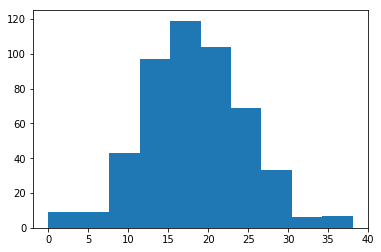

In [14]:
# Histogram of points per 100
plt.hist(stats00['PTS'])

(array([130.,  74.,  47.,  46.,  46.,  41.,  40.,  32.,  29.,  11.]),
 array([1.0000e+00, 3.4730e+02, 6.9360e+02, 1.0399e+03, 1.3862e+03,
        1.7325e+03, 2.0788e+03, 2.4251e+03, 2.7714e+03, 3.1177e+03,
        3.4640e+03]),
 <a list of 10 Patch objects>)

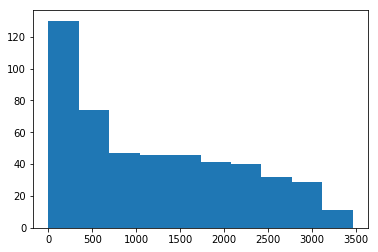

In [15]:
# Histogram of minutes played. I want to get rid of players who didn't play a lot of minutes. Their stats will
# be inflated/meaningless, and they're not going to be MVP...
# 48 minutes per game X 82 games = 3936 total minutes in the season.
plt.hist(stats00['MP'])

In [16]:
stats00['MP'].describe()

count     496.000000
mean     1200.512097
std       957.736755
min         1.000000
25%       331.500000
50%      1021.000000
75%      1953.750000
max      3464.000000
Name: MP, dtype: float64

In [17]:
# I think it's reasonable to get rid of the bottom quartile. 
stats00.sort_values(by=['MP']).head()
stats00 = stats00[stats00.MP > 331.5]

(array([67., 48., 42., 36., 50., 34., 34., 27., 26.,  8.]),
 array([ 332. ,  645.2,  958.4, 1271.6, 1584.8, 1898. , 2211.2, 2524.4,
        2837.6, 3150.8, 3464. ]),
 <a list of 10 Patch objects>)

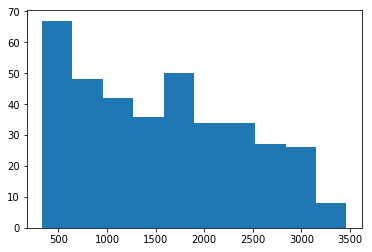

In [18]:
plt.hist(stats00.MP)

(array([ 4., 17., 50., 75., 91., 73., 36., 19.,  3.,  4.]),
 array([ 4.4 ,  7.77, 11.14, 14.51, 17.88, 21.25, 24.62, 27.99, 31.36,
        34.73, 38.1 ]),
 <a list of 10 Patch objects>)

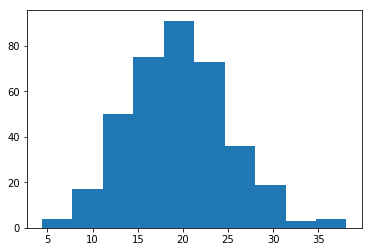

In [19]:
# Now what does the pts per 100 histogram look like?
plt.hist(stats00['PTS'])

In [20]:
# Who was scoring the most?
stats00.sort_values(by='PTS',ascending=False).head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
283,243,Karl Malone*\malonka01,PF,36,UTA,82,82,2947,13.7,26.8,...,11.1,14.2,5.5,1.4,1.3,4.2,4.2,38.1,115.0,100
336,294,Shaquille O'Neal*\onealsh01,C,27,LAL,79,79,3163,15.5,27.1,...,12.1,17.5,4.9,0.6,3.9,3.6,4.1,38.1,115.0,95
215,187,Allen Iverson*\iversal01,SG,24,PHI,70,70,2853,13.2,31.5,...,3.6,4.8,6.0,2.6,0.1,4.2,2.9,36.1,101.0,102
83,70,Vince Carter\cartevi01,SF,23,TOR,82,82,3126,13.1,28.2,...,5.4,7.9,5.3,1.8,1.5,3.0,4.4,35.0,112.0,105
201,175,Grant Hill\hillgr01,SF,27,DET,74,74,2776,12.6,25.7,...,7.1,8.9,7.0,1.9,0.8,4.3,3.4,34.5,111.0,105


In [32]:
# time to move on to collecting all the seasons together.
all_files = glob.glob(os.path.join('/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data','*csv'))
file_dict = dict.fromkeys(all_files)
print(all_files)
for f in all_files:
    file_dict[f] = pd.read_csv(f)
for k, f in file_dict.items():
    file_dict[(k.replace('/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/','')).replace('.csv','')] = file_dict.pop(k)
print(file_dict.keys())
for y in range(1980,2013):
    file_dict[str(y)] = file_dict[str(y)].assign(Year = y)
    file_dict[str(y)] = file_dict[str(y)].drop(columns=['Unnamed: 29'])
    file_dict[str(y)] = file_dict[str(y)].assign(MVP = 0)
season_dict = file_dict.copy()
mvps = season_dict.pop('mvp-all-years')
big_frame = pd.concat(season_dict.values(),ignore_index=True)
# Get rid of players in the bottom quartile of minutes played.
big_frame = big_frame[big_frame.MP > 314]

def get_mvp_by_year(y):
    if(y in range(1980,2013)):
        return str(list(mvps.loc[mvps["Year"]==y].to_dict()['MVP'].values())[0])
    else:
        print("Year not available.")
        return -1
def get_frame_by_year(y):
    return big_frame.loc[big_frame["Year"]==y]
def find_mvp_idx_by_year(y):
    x = get_frame_by_year(y)
    return x.loc[x['Player'].str.contains(get_mvp_by_year(y))].iloc[-1].name

['/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1990.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1984.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1985.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1991.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1987.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1993.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1992.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1986.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1982.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1996.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1997.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1983.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1995.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-ML-2/data/1981.csv', '/Users/dbauer/Coding/machine-learning-etc/nba-

KeyError: '1988'

In [ ]:
mvp_indices = list(map(find_mvp_idx_by_year,list(range(1980,2010))))
big_frame.loc[mvp_indices[2],'MVP']

In [ ]:
for i in mvp_indices:
    big_frame.loc[i,'MVP'] = 1

In [ ]:
y_vals = dict.fromkeys(range(1980,2012))
x_vals=dict.fromkeys(range(1980,2012))
for y in range(1980,2012):
    y_vals[y] = big_frame[big_frame.Year == y]["MVP"]
    x_vals[y] = big_frame[big_frame.Year == y][["G","MP","FG","FGA","3P","3PA","2P","2PA","FT","FTA","ORB","DRB","AST","STL","BLK","TOV","PF","PTS","ORtg","DRtg"]]

In [ ]:
my_svc = sklearn.svm.SVC()

In [ ]:
my_svc.fit(x_vals[1990],y_vals[1990])

In [ ]:
list(my_svc.predict(x_vals[2008])).index(1)

In [ ]:
x_vals[1982]